# Simulation: $\frac{1}{Z-R}$

Plot a heatmap and make conjectures about $\frac{1}{Z-R}$, where $R$ is either circularly symmetric or a specific circuarly symmetric distribution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
def P2R(A, phi):
    return A * (np.cos(phi) + np.sin(phi)*1j)

In [25]:
def sample_cn(n_samples, std_dev=1):
    return np.random.normal(
        size=(n_samples, 2),
        scale=1,
    ).view(np.complex128)[:, 0]

In [118]:
def plot_c(samples, lim=None, n_bins=128, def_fig=True):
    """
    Plot a heatmap of a 1D numpy array of complex numbers.
    """
    if def_fig:
        plt.figure(figsize=(8,8))
    if lim == None:
        lim = (min(np.amin(samples.real), np.amin(samples.imag)), max(np.amax(samples.real), np.amax(samples.imag)))
    plt.hist2d(
        x=samples.real,
        y=samples.imag,
        bins=n_bins,
        range=(lim, lim),
    )

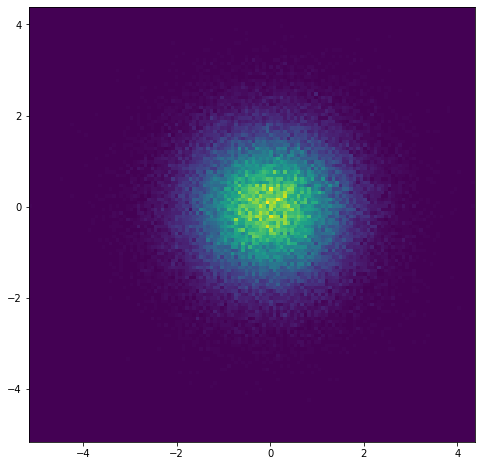

In [119]:
plot_c(sample_cn(100000))

In [109]:
def sample_r_cn(Z, n_samples=10000):
    """
    Return a 1D numpy array of each of the samples transformed by R = CN(0, 1).
    """
    # sample R, 1D array of shape (n_samples,)
    R_sampled = sample_cn(n_samples)
    
    # calculate Z-R
    Z_sampled = np.full((n_samples,), Z, dtype=complex)
    Z_R_sampled = Z_sampled - R_sampled
    
    # calculate 1/(Z-R)
    Z_R_1_sampled = 1 / Z_R_sampled
    
    return Z_R_1_sampled

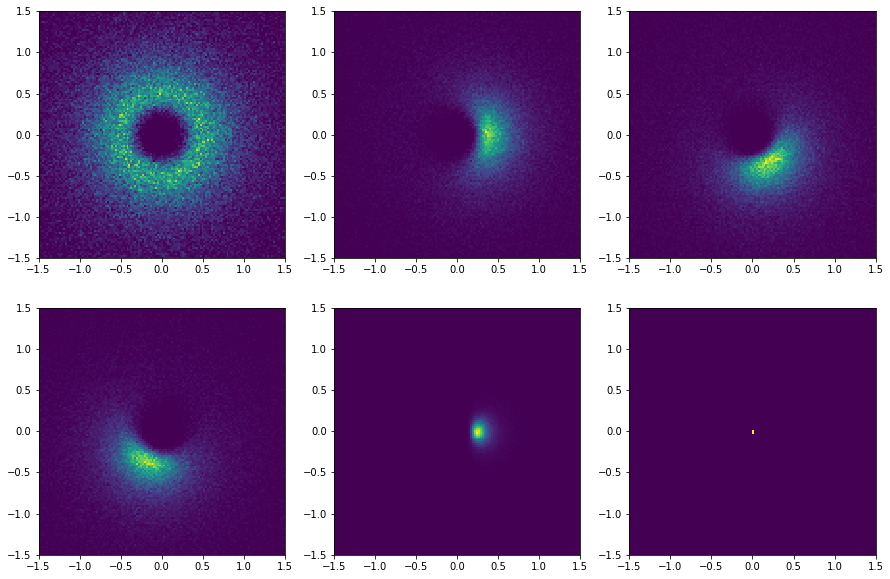

In [168]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plot_c(sample_r_cn(0, 100000), lim=(-1.5, 1.5), def_fig=False)
plt.subplot(2, 3, 2)
plot_c(sample_r_cn(1, 100000), lim=(-1.5, 1.5), def_fig=False)
plt.subplot(2, 3, 3)
plot_c(sample_r_cn(P2R(1, 1), 100000), lim=(-1.5, 1.5), def_fig=False)
plt.subplot(2, 3, 4)
plot_c(sample_r_cn(P2R(1, 2), 100000), lim=(-1.5, 1.5), def_fig=False)
plt.subplot(2, 3, 5)
plot_c(sample_r_cn(3, 100000), lim=(-1.5, 1.5), def_fig=False)
plt.subplot(2, 3, 6)
plot_c(sample_r_cn(50, 100000), lim=(-1.5, 1.5), def_fig=False)

In [158]:
def plot_r(samples, hlim=None, n_bins=128, def_fig=True):
    """
    Plot a heatmap of a 1D numpy array of real numbers.
    """
    if def_fig:
        plt.figure(figsize=(8,8))
    if hlim == None:
        hlim = np.amax(samples)
    plt.hist(
        samples,
        bins=n_bins,
        range=(0, hlim),
        density=True,
    )

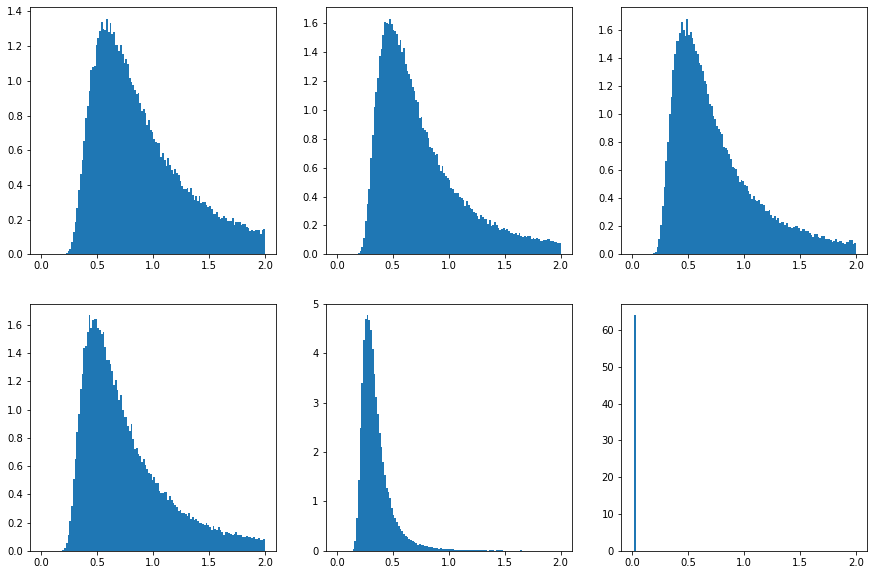

In [169]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plot_r(np.absolute(sample_r_cn(0, 100000)), hlim=2, def_fig=False)
plt.subplot(2, 3, 2)
plot_r(np.absolute(sample_r_cn(1, 100000)), hlim=2, def_fig=False)
plt.subplot(2, 3, 3)
plot_r(np.absolute(sample_r_cn(P2R(1, 1), 100000)), hlim=2, def_fig=False)
plt.subplot(2, 3, 4)
plot_r(np.absolute(sample_r_cn(P2R(1, 2), 100000)), hlim=2, def_fig=False)
plt.subplot(2, 3, 5)
plot_r(np.absolute(sample_r_cn(3, 100000)), hlim=2, def_fig=False)
plt.subplot(2, 3, 6)
plot_r(np.absolute(sample_r_cn(50, 100000)), hlim=2, def_fig=False)